In [1]:
import pickle

with open("/home/IAIS/nchakrabor/PycharmProjects/kgqa/features.wganlp.out", "rb") as fp:
    loaded_wganlp = pickle.load(fp)
    
with open("/home/IAIS/nchakrabor/PycharmProjects/kgqa/features.baseline.out", "rb") as fp:
    loaded_baseline = pickle.load(fp)

In [7]:
# loaded = loaded[:,:1000]
# len(accuracy)

'/home/IAIS/nchakrabor/PycharmProjects/notebooks'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
# from tsnecuda import TSNE

# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt

# source = loaded['valid'].cpu().numpy()
# target = loaded['target-valid'].cpu().numpy()

# X = np.concatenate([source, target])
def plot_features(loaded):
    features, accuracy = loaded.values()
    X = features
    X = X + np.random.rand(*X.shape)*0.000000001
    langs = np.concatenate([np.zeros(512), np.ones(512)])
    labels_acc_lang = []
    labels_lang = []

    for acc, lang in zip(accuracy, langs):
        if acc == 0:
            if lang == 0:
                labels_acc_lang.append("source-positive")
            else:
                labels_acc_lang.append("target-positive")
        else:
            if lang == 0:
                labels_acc_lang.append("source-negative")
            else:
                labels_acc_lang.append("target-negative")
                
    for lang in langs:
        if lang == 0:
            labels_lang.append("source")
        else:
            labels_lang.append("target")

#     X_transformed = TSNE(n_components=2, verbose=3, perplexity=100, n_iter=1000).fit_transform(X)
    # X = PCA(n_components=2).fit_transform(X)
    X = torch.Tensor(X)
    X_transformed = torch.pca_lowrank(X, q=2)[0]

    # df = pd.DataFrame(X)
    # df['y'] = Y
    # df['label'] = df['y'].apply(lambda i: str(i))

    plt.figure(figsize=(16,10))
    sns.scatterplot(X_transformed[:,0], X_transformed[:,1], hue=labels_acc_lang, legend='full', palette=sns.color_palette("hls", 4))

    plt.figure(figsize=(16,10))
    sns.scatterplot(X_transformed[:,0], X_transformed[:,1], hue=labels_lang, legend='full', palette=sns.color_palette("hls", 2))
    # sns.scatterplot(
    #     x="tsne-2d-one", y="tsne-2d-two",
    #     hue="y",
    #     palette=sns.color_palette("hls", 10),
    #     data=df,
    #     legend="full",
    #     alpha=0.3
    # )

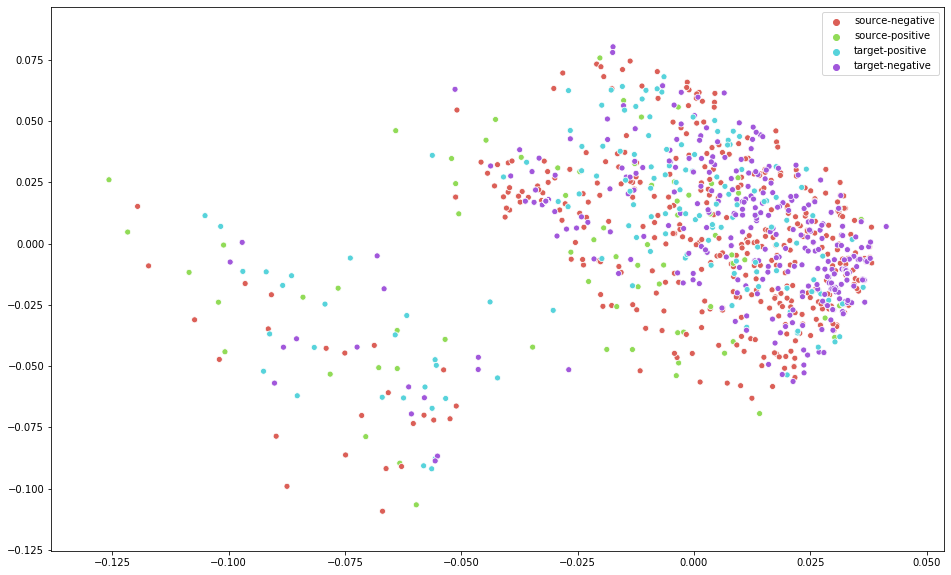

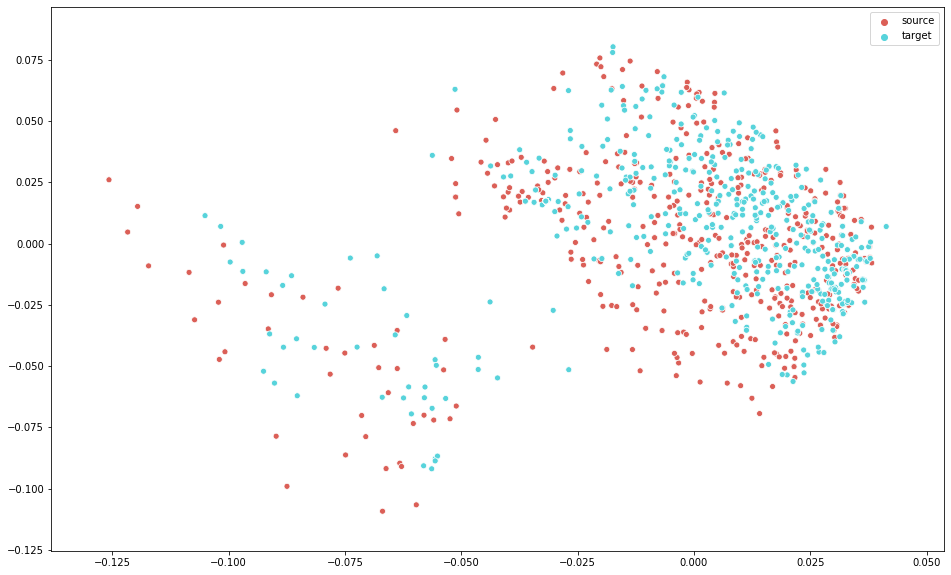

In [5]:
plot_features(loaded_wganlp)

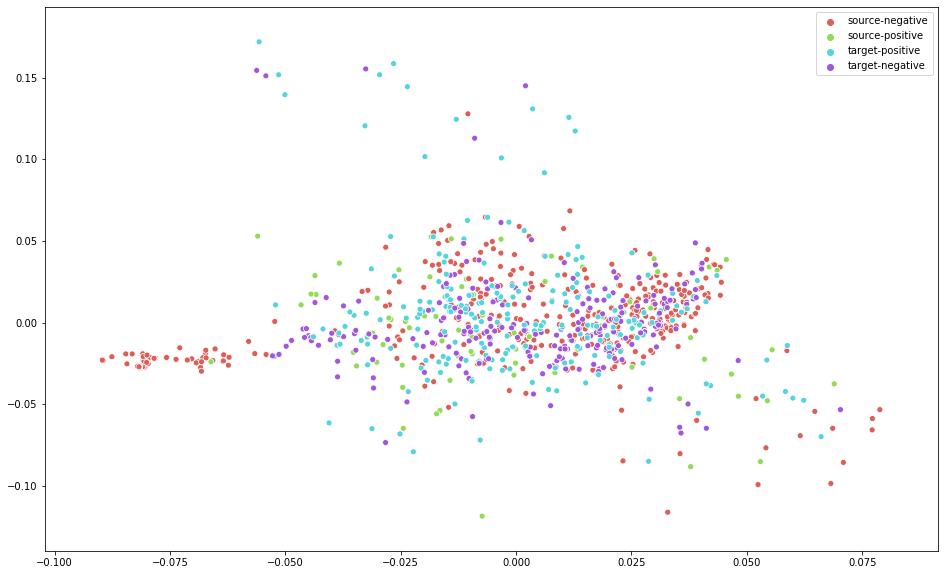

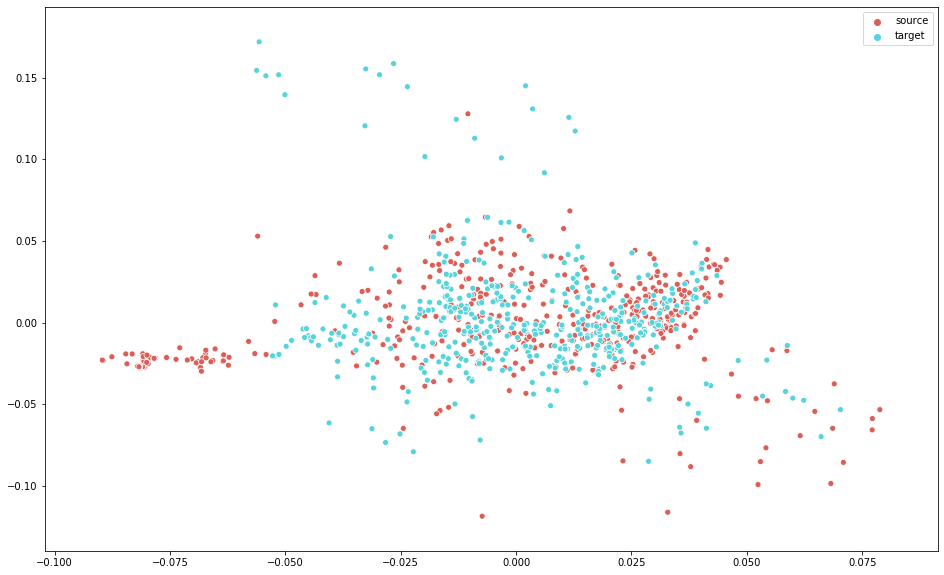

In [6]:
plot_features(loaded_baseline)

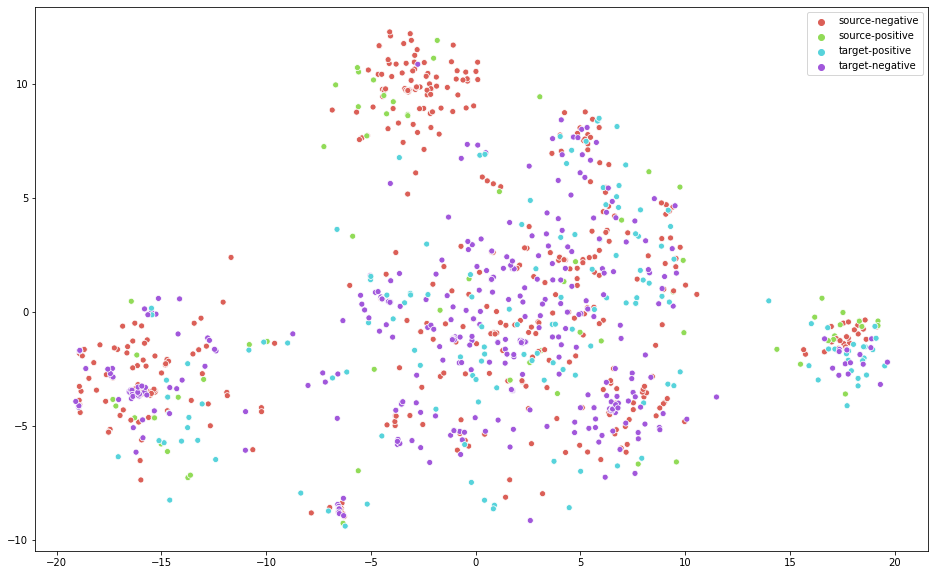

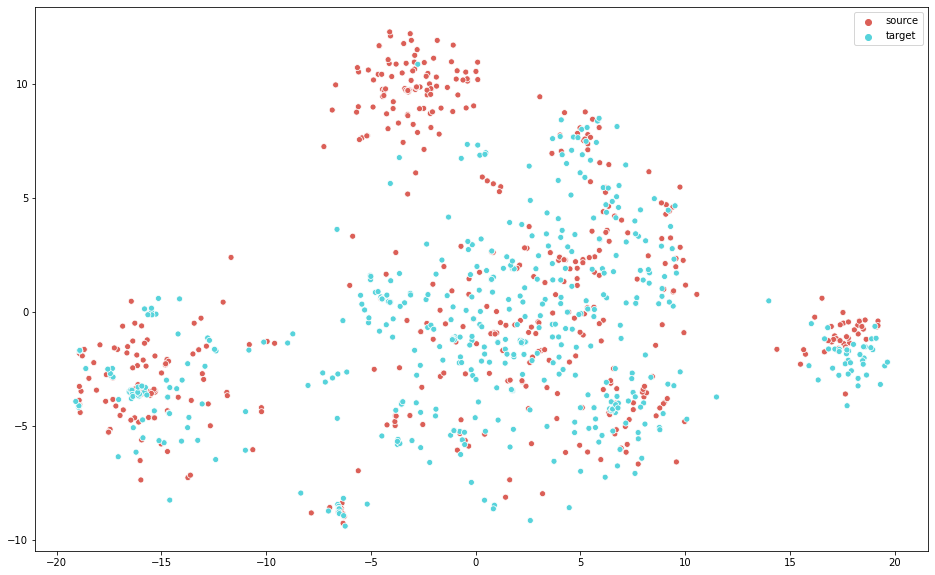

In [68]:
plot_features(loaded_wganlp)

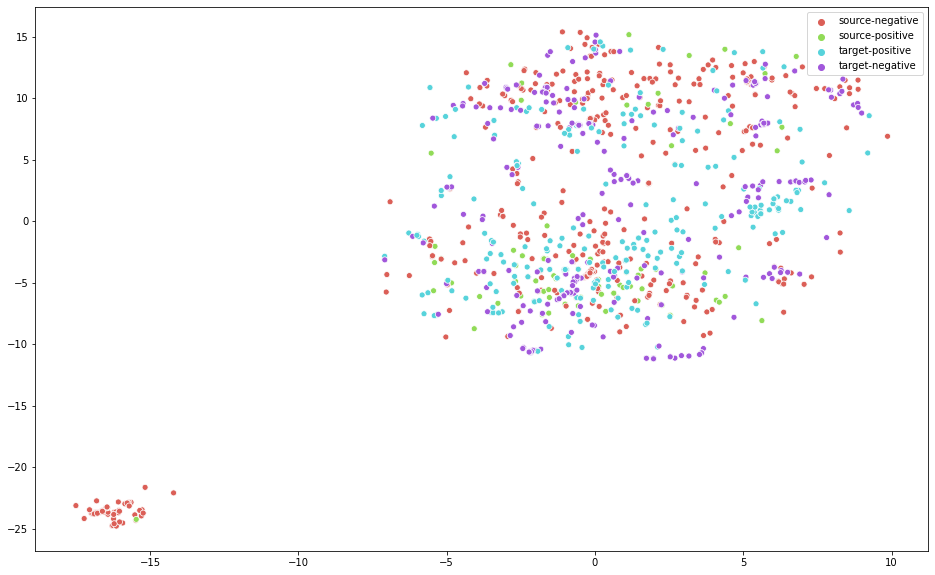

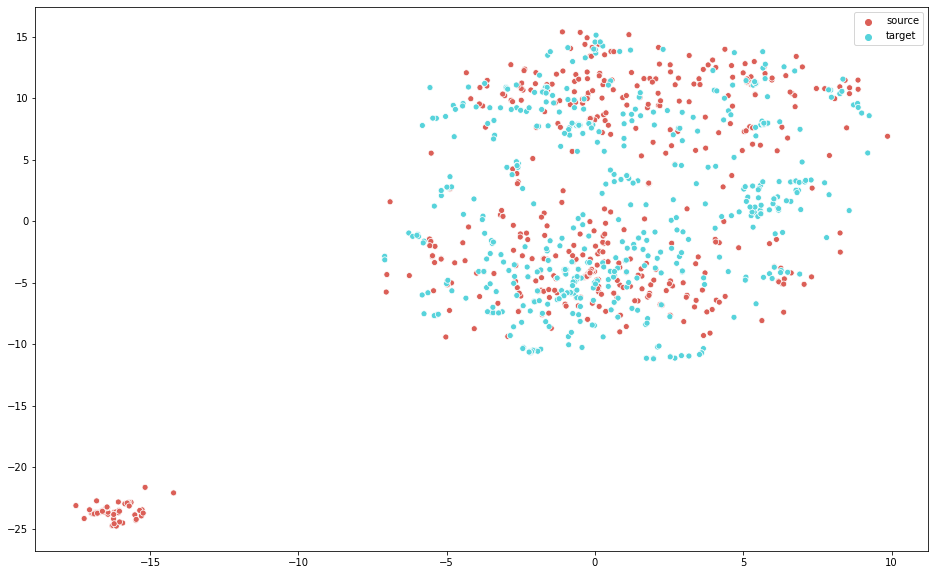

In [69]:
plot_features(loaded_baseline)

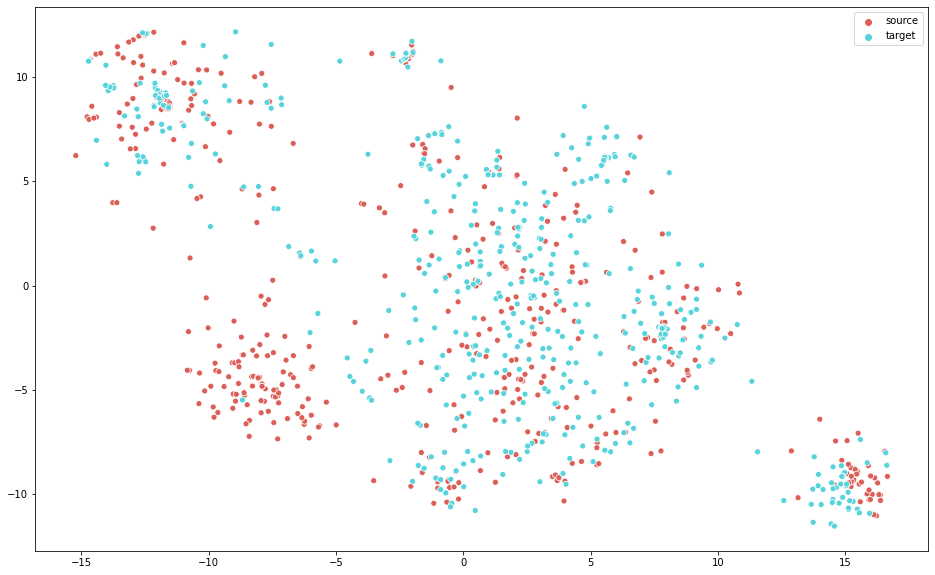